In [12]:
import numpy as np
import torch
import torch.nn.functional as F
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

from au2v.analyst import Analyst
from au2v.config import ModelConfig, TrainerConfig
from au2v.dataset import load_dataset_manager
from au2v.trainer import PyTorchTrainer

In [7]:
torch.manual_seed(0)
np.random.seed(0)

trainer_config = TrainerConfig(
    dataset_name="toydata-paper", epochs=3, ignore_saved_model=True, load_model=False, batch_size=64,
    model_dir="../cache/model/", dataset_dir="../cache/dataset/"
)
model_config = ModelConfig(d_model=128, lr=0.0001, init_embedding_std=0.2, window_size=5)

In [8]:
trainer_config

TrainerConfig(model_name='attentive', dataset_name='toydata-paper', epochs=3, batch_size=64, verbose=False, ignore_saved_model=True, load_model=False, save_model=True, load_dataset=True, save_dataset=True, model_dir='../cache/model/', dataset_dir='../cache/dataset/')

In [9]:
model_config

ModelConfig(d_model=128, init_embedding_std=0.2, max_embedding_norm=None, window_size=5, negative_sample_size=5, lr=0.0001)

In [10]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
    data_dir="../data/"
)

dataset_manager does not exist at: ../cache/dataset/toydata-paper.pickle, create dataset
num_seq: 10000, num_item: 750, num_item_meta: 8, num_seq_meta: 7, num_item_meta_types: 2, num_seq_meta_types: 2
to_sequential_data start


100%|██████████| 10000/10000 [00:45<00:00, 217.81it/s]


to_sequential_data end
to_sequential_data start


100%|██████████| 10000/10000 [00:44<00:00, 226.35it/s]


to_sequential_data end
dumping dataset_manager to: ../cache/dataset/toydata-paper.pickle
dumped dataset_manager to: ../cache/dataset/toydata-paper.pickle


In [13]:
trainer = PyTorchTrainer(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)
analyst = Analyst(
    dataset_manager=dataset_manager,
    model=trainer.model
)

In [17]:
def calc_spearmanr(v, c):
    p_c = []
    for e in c:
        for i, e2 in enumerate(v):
            if e == e2[1]:
                p_c.append(i)
    p_v = list(range(len(v)))
    return spearmanr(p_c, p_v)

def on_epoch_start(epoch: int):
    m_v = analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "M", "genre", method="inner-product"
    )
    f_v = analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "F", "genre", method="inner-product"
    )
    # f_c = ["Romance", "Musical", "Children's", "Animation", "Drama", "Comedy", "Mystery", "Documentary", "Fantasy", "Film-Noir", "Thriller", "Crime", "War", "Adventure", "Horror", "Action", "Sci-Fi", "Western"]
    # m_c = reversed(f_c)
    # m_spearman = calc_spearmanr(m_v, m_c)
    # f_spearman = calc_spearmanr(f_v, f_c)
    # print(f"M_spearman_result: {m_spearman}")
    # print(f"F_spearman_result: {f_spearman}")

    # analyst.similarity_between_seq_meta_and_item_meta(
    #     "age", "10", "year", method="inner-product", num_top_values=30, verbose=True
    # )
    # analyst.similarity_between_seq_meta_and_item_meta(
    #     "age", "30", "year", method="inner-product", num_top_values=30, verbose=True
    # )
    # analyst.similarity_between_seq_meta_and_item_meta(
    #     "age", "50", "year", method="inner-product", num_top_values=30, verbose=True
    # )

    # print("seq:", analyst.trainer.model.embedding_seq.embedding_element.weight.data.mean(), analyst.trainer.model.embedding_seq.embedding_element.weight.data.std(), analyst.trainer.model.embedding_seq.embedding_meta.weight.data.mean(), analyst.trainer.model.embedding_seq.embedding_meta.weight.data.std(),)
    # print("item:", analyst.trainer.model.embedding_item.embedding_element.weight.data.mean(), analyst.trainer.model.embedding_item.embedding_element.weight.data.std(), analyst.trainer.model.embedding_item.embedding_meta.weight.data.mean(), analyst.trainer.model.embedding_item.embedding_meta.weight.data.std(),)
    # print(F.cosine_similarity(analyst.trainer.model.embedding_seq.embedding_element.weight[6], analyst.trainer.model.embedding_seq.embedding_element.weight[7], dim=0))
    analyst.visualize_meta_embedding("age", "year", method="pca")
    analyst.visualize_meta_embedding("gender", "genre", method="pca")

train start


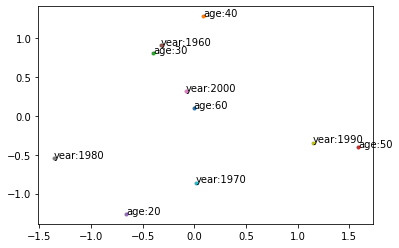

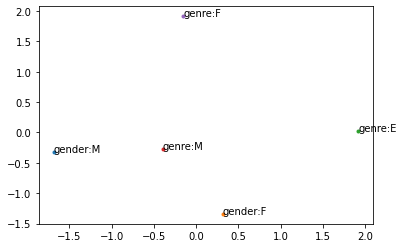

100%|██████████| 1407/1407 [00:04<00:00, 293.29it/s]


Epoch: 1, loss: 0.23821591105144613, test_loss: {'test': 0.239180799856962}
saved best model to ../cache/model/toydata-paper/best-attentive.pt


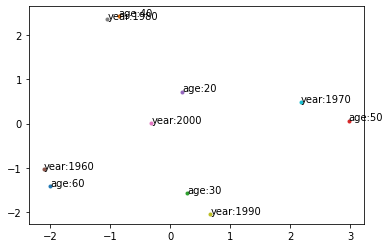

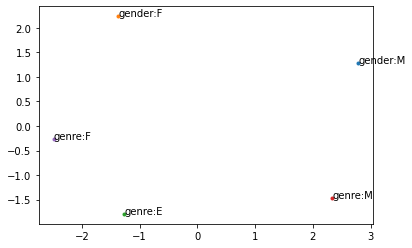

100%|██████████| 1407/1407 [00:05<00:00, 277.16it/s]


Epoch: 2, loss: 0.22397809835351956, test_loss: {'test': 0.22918110362544666}
saved best model to ../cache/model/toydata-paper/best-attentive.pt


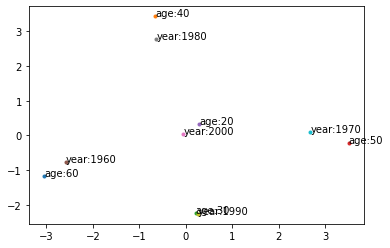

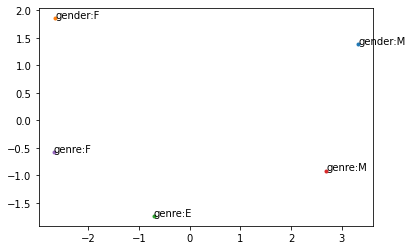

100%|██████████| 1407/1407 [00:04<00:00, 303.72it/s]

Epoch: 3, loss: 0.21898898883093995, test_loss: {'test': 0.22435826663650685}
saved best model to ../cache/model/toydata-paper/best-attentive.pt
train end
saved model to ../cache/model/toydata-paper/attentive.pt


{'train': [0.23821591105144613, 0.22397809835351956, 0.21898898883093995],
 'test': [0.239180799856962, 0.22918110362544666, 0.22435826663650685]}

In [18]:
trainer.fit(show_fig=False, on_epoch_start=on_epoch_start)

In [19]:
analyst.similarity_between_seq_meta_and_item_meta("gender", "M", "genre")

,similarity,item_meta
0,10.684203,genre:M
1,-0.966498,genre:E
2,-7.802520,genre:F


In [21]:
analyst.similarity_between_seq_meta_and_item_meta("gender", "F", "genre")

,similarity,item_meta
0,11.349966,genre:F
1,2.725331,genre:E
2,-8.804426,genre:M
